<a href="https://colab.research.google.com/github/DIEUDONNE-DENGUN/DenPlaces/blob/master/Disease_Diagnostic_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection  import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.externals import joblib

# Data Import  , Preprocessing and Transformation 

 ***  Read Dataset from project repository, btoh training dataset and testing dataset using      Panda ***

In [0]:
data =pd.read_csv('https://raw.githubusercontent.com/DIEUDONNE-DENGUN/symptoms-disease-prediction/master/Training_Data.csv')  
test_data= pd.read_csv('https://raw.githubusercontent.com/DIEUDONNE-DENGUN/symptoms-disease-prediction/master/Testing_Data.csv')
# data = pd.read_csv('https://raw.githubusercontent.com/DIEUDONNE-DENGUN/Predicting-Diseases-From-Symptoms/master/Scraped-Data/df_pivoted.csv')

***Preprocess both the test data and training data using dimensality reduction technique namely High Correlation Filtering Technique, to compensate for missing value, invalid entries ***


*** Transform the output label (diseases) from a textual value to a numerical                representation using label encoding technique***

In [0]:
print data.shape  #show the matrix representation of the dataset
print test_data.shape #print test data shape
data = data.fillna(0) #Fill all null values for the respective symptoms with a zero
test_data =test_data.fillna(0) #clean test data for missiing values
# data=data.iloc[:, 1:]  #Remove the first colum from the dataset, noisy and unuseful column
# data =pd.get_dummies(data, prefix_sep='_', drop_first=True) 

from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
labelencoder_test = LabelEncoder()
data.iloc[0:, 132] = labelencoder.fit_transform(data.iloc[0:, 132])  #encode and transform the training data into numerical value
test_data.iloc[0:, 132] =  labelencoder_test.fit_transform(test_data.iloc[0:, 132]) #encode and transform test data
test_data

(350, 133)
(10, 133)


,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,muscle_wasting,vomiting,burning_micturition,spotting_ urination,fatigue,weight_gain,anxiety,cold_hands_and_feets,mood_swings,weight_loss,restlessness,lethargy,patches_in_throat,irregular_sugar_level,cough,high_fever,sunken_eyes,breathlessness,sweating,dehydration,indigestion,headache,yellowish_skin,dark_urine,nausea,loss_of_appetite,pain_behind_the_eyes,back_pain,constipation,abdominal_pain,...,internal_itching,toxic_look_(typhos),depression,irritability,muscle_pain,altered_sensorium,red_spots_over_body,belly_pain,abnormal_menstruation,dischromic _patches,watering_from_eyes,increased_appetite,polyuria,family_history,mucoid_sputum,rusty_sputum,lack_of_concentration,visual_disturbances,receiving_blood_transfusion,receiving_unsterile_injections,coma,stomach_bleeding,distention_of_abdomen,history_of_alcohol_consumption,fluid_overload.1,blood_in_sputum,prominent_veins_on_calf,palpitations,painful_walking,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,1,1,1,1,0,1,1,1,1,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,1,0,...,0,0,1,1,1,0,0,0,1,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
2,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,1,...,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,4
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3
5,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
6,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,1,...,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,4
7,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3
8,1,1,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
9,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


We need to try both multinomial NB classifier and also binomial classifer. Multinomial classifier is doesn't punish the the non-occurunce of a feature which is a good indicator for a particular disease, whilst Binomial does. 

Not sure which makes more sense in the medical context. 

Need to try both and compare using the right way of doing it (cross validation). Need to read up on evaulating and comparing models. 

Till then will just do a test and train split.

________

---
# ##Developing  a Naive Baye approach or classifier for the Disease dataset
***   Using a Multinomial NB classifier***


In [0]:
print data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Columns: 133 entries, itching to prognosis
dtypes: int64(133)
memory usage: 363.7 KB
None


In [0]:
cols = data.columns.tolist() #get all clumns from the dataset and convert it to a list structure
# cols.remove('Source')
# del cols[132:]
cols.remove('prognosis')  #Again clean the dataset by removing the noisy firs colum
X_train = data[cols]   #Define the features of the model which involve the symptoms
Y_train = data.prognosis  #Define the class labels which are the diseases to be trained 
train_colums=['malaise','belly_pain','fatigue','nausea','chills','itching','constipation','swelled_lymph_nodes','loss_of_appetite','toxic_look_(typhos)','headache','receiving_blood_transfusion','cough','phlegm','breathlessness','dark_urine','yellowing_of_eyes','receiving_unsterile_injections','nodal_skin_eruptions','vomiting','chest_pain','abdominal_pain','sweating','dischromic _patches','high_fever','muscle_pain','mild_fever','blood_in_sputum','skin_rash','yellow_urine']
X_train=data[train_colums]
print(X_train)
# test_cols=test_data.columns.tolist()
# test_cols.remove('prognosis')
test_colums=train_colums
X_test=test_data[test_colums]
Y_test=test_data.prognosis



     malaise  belly_pain  fatigue  ...  blood_in_sputum  skin_rash  yellow_urine
0          0           0        0  ...                0          1             0
1          0           0        0  ...                0          1             0
2          0           0        0  ...                0          0             0
3          0           0        0  ...                0          1             0
4          0           0        0  ...                0          1             0
5          0           0        0  ...                0          1             0
6          0           0        0  ...                0          0             0
7          0           0        0  ...                0          1             0
8          0           0        0  ...                0          1             0
9          0           0        0  ...                0          1             0
10         0           0        0  ...                0          0             0
11         0           0    

## **TRAINING DATA AFTER PREPROCESSING AND TRANSFORMATION**

In [0]:
#split the dataset into training set and test data to ensure cross validation and limit overfitting
# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42) 
X_test

,malaise,belly_pain,fatigue,nausea,chills,itching,constipation,swelled_lymph_nodes,loss_of_appetite,toxic_look_(typhos),headache,receiving_blood_transfusion,cough,phlegm,breathlessness,dark_urine,yellowing_of_eyes,receiving_unsterile_injections,nodal_skin_eruptions,vomiting,chest_pain,abdominal_pain,sweating,dischromic _patches,high_fever,muscle_pain,mild_fever,blood_in_sputum,skin_rash,yellow_urine
0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
1,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,1,1,1,0,0,1,0
2,0,1,1,1,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0
3,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,1,0,1,0,0,1,1,0,0,0,1,1,1,0,1,0,0,1,1,0,1,0,1,0,1,0,0,0
5,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,1,0,0,0,0
6,0,1,1,1,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0
7,1,0,1,0,1,0,0,1,1,0,0,0,1,1,1,0,1,0,0,1,1,0,1,0,1,0,1,0,0,0
8,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,1,1,1,0,0,1,0,0,0,0,0,0,1,1
9,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0


### Development of classifier , training and testing 

> Training and Test


A Multinomial Naive Bayesian algorithm is to train the dataset and later testing and cross-validation with the test data 

In [0]:
mnb_tot = MultinomialNB(alpha=0.01)
mnb_tot = mnb_tot.fit(X_train, Y_train)
# mnb_tot=mnb_tot.fit(x_train,y_train)

In [0]:
test = mnb_tot.predict(X_train)
mnb_tot.score(X_train, Y_train)

1.0

In [0]:
print('Training accuracy')
print(accuracy_score(Y_train, mnb_tot.predict(X_train)))
print('\n')

print('Test accuracy')
print(accuracy_score(Y_test, mnb_tot.predict(X_test)))
print('\n')

disease_pred = mnb_tot.predict(X_test)
accuracy_score(Y_test,disease_pred)

disease_pred = labelencoder.inverse_transform(disease_pred)
Y_test= labelencoder_test.inverse_transform(Y_test)


print("Expected Test Diseases Using Naive Baye Classifier \n")
print (labelencoder_test.inverse_transform(test_data.prognosis))
print('\n')

print('Predicted Diseases from Test Diseases using Naive Baye Classifier\n')

print(disease_pred)

Training accuracy
1.0
Test accuracy
0.9
Expected Test Diseases Using Naive Baye Classifier 

['Fungal infection' 'Malaria' 'Typhoid' 'Hepatitis B' 'Tuberculosis'
 'Malaria' 'Typhoid' 'Tuberculosis' 'Hepatitis B' 'Fungal infection']


Predicted Diseases from Test Diseases using Naive Baye Classifier

['Fungal infection' 'Fungal infection' 'Typhoid' 'Hepatitis B'
 'Tuberculosis' 'Malaria' 'Typhoid' 'Tuberculosis' 'Hepatitis B'
 'Fungal infection']


**Model evaluation and results presentation**

 
*** Display the classification report of the testing done with the test data***

In [0]:
disease_real = Y_train.values


from sklearn import metrics

print('Naive Baye Classifier Classification Report\n')
print metrics.classification_report(Y_test, disease_pred)

Naive Baye Classifier Classification Report

                  precision    recall  f1-score   support

Fungal infection       0.67      1.00      0.80         2
     Hepatitis B       1.00      1.00      1.00         2
         Malaria       1.00      0.50      0.67         2
    Tuberculosis       1.00      1.00      1.00         2
         Typhoid       1.00      1.00      1.00         2

       micro avg       0.90      0.90      0.90        10
       macro avg       0.93      0.90      0.89        10
    weighted avg       0.93      0.90      0.89        10



In [0]:
nb_confusion_matrix=metrics.confusion_matrix(Y_test, disease_pred)
nb_confusion_matrix

array([[2, 0, 0, 0, 0],
       [0, 2, 0, 0, 0],
       [1, 0, 1, 0, 0],
       [0, 0, 0, 2, 0],
       [0, 0, 0, 0, 2]])

***Display list of all diseases which were correctly predicted and those which was not classified ***




In [0]:
print('List of diseases which were not correctly classified and their real values :\n')
for i in range(0, len(Y_test)):
    if disease_pred[i] == Y_test[i]:
        print 'Correct Prediction : {0}   |---|   Real Disease: {1}'.format(disease_pred[i], Y_test[i])
    else:
        print 'Wrong Prediction : {0}   |---|   Real Disease: {1}'.format(disease_pred[i], Y_test[i])

List of diseases which were not correctly classified and their real values :

Correct Prediction : Fungal infection   |---|   Real Disease: Fungal infection
Wrong Prediction : Fungal infection   |---|   Real Disease: Malaria
Correct Prediction : Typhoid   |---|   Real Disease: Typhoid
Correct Prediction : Hepatitis B   |---|   Real Disease: Hepatitis B
Correct Prediction : Tuberculosis   |---|   Real Disease: Tuberculosis
Correct Prediction : Malaria   |---|   Real Disease: Malaria
Correct Prediction : Typhoid   |---|   Real Disease: Typhoid
Correct Prediction : Tuberculosis   |---|   Real Disease: Tuberculosis
Correct Prediction : Hepatitis B   |---|   Real Disease: Hepatitis B
Correct Prediction : Fungal infection   |---|   Real Disease: Fungal infection


*** Check why a disease was wrongly predicted by inference from its  its associated symtoms.***

------
# **Developing a Random Forest approach to the disease prediction**

In [0]:

rand_classifier = RandomForestClassifier(n_estimators=10, random_state=33) #Set up a random forest classifier
rf_model = rand_classifier.fit(X_train, Y_train)    #train the classifier using the train data x and y
# joblib.dump(trained_model, 'RandomForestF.pkl')  #

test = rf_model.predict(X_train)
print('Random Forest training accuracy')
print(rf_model.score(X_train, Y_train))
 
Y_test=labelencoder.transform(Y_test)  #tranform training data to numeric representation

rf_disease_pred = rand_classifier.predict(X_test)
print('Random Forest Test accuracy')
print(accuracy_score(Y_test,rf_disease_pred))  #evalute the accuracy of the test data and predicted values


Y_test= labelencoder_test.inverse_transform(Y_test)
print('Test Diseases using Random Forest Classifier\n')
print(Y_test)
print('\n')

rf_disease_pred = labelencoder.inverse_transform(rf_disease_pred) #convert back predicted disease numerical representation to text for display
print('Predicted Diseases from test disease set using Random Forest Classifier\n')
print(rf_disease_pred)  
print('\n')

print('Random Forest Classifier Classification Report\n')
print metrics.classification_report(Y_test, rf_disease_pred) #calculate and display the classification report for the classification done the test and predicted values

Random Forest training accuracy
1.0
Random Forest Test accuracy
1.0
Test Diseases using Random Forest Classifier

['Fungal infection' 'Malaria' 'Typhoid' 'Hepatitis B' 'Tuberculosis'
 'Malaria' 'Typhoid' 'Tuberculosis' 'Hepatitis B' 'Fungal infection']


Predicted Diseases from test disease set using Random Forest Classifier

['Fungal infection' 'Malaria' 'Typhoid' 'Hepatitis B' 'Tuberculosis'
 'Malaria' 'Typhoid' 'Tuberculosis' 'Hepatitis B' 'Fungal infection']


Random Forest Classifier Classification Report

                  precision    recall  f1-score   support

Fungal infection       1.00      1.00      1.00         2
     Hepatitis B       1.00      1.00      1.00         2
         Malaria       1.00      1.00      1.00         2
    Tuberculosis       1.00      1.00      1.00         2
         Typhoid       1.00      1.00      1.00         2

       micro avg       1.00      1.00      1.00        10
       macro avg       1.00      1.00      1.00        10
    weighted avg 

In [0]:
rf_confusion_matrix=metrics.confusion_matrix(Y_test, rf_disease_pred)
rf_confusion_matrix


array([[2, 0, 0, 0, 0],
       [0, 2, 0, 0, 0],
       [0, 0, 2, 0, 0],
       [0, 0, 0, 2, 0],
       [0, 0, 0, 0, 2]])

**Display a list of all correctly predicted diseases and those wrongly classified**

In [0]:
print('Random Forest - List of diseases which were correctly and not rightly classified and their real values :\n')
for i in range(0, len(Y_test)):
    if rf_disease_pred[i] == Y_test[i]:
        print 'Correct Prediction : {0}   |---|   Real Disease: {1}'.format(rf_disease_pred[i], Y_test[i])
    else:
        print 'Wrong Prediction : {0}   |---|   Real Disease: {1}'.format(rf_disease_pred[i], Y_test[i])

Random Forest - List of diseases which were correctly and not rightly classified and their real values :

Correct Prediction : Fungal infection   |---|   Real Disease: Fungal infection
Correct Prediction : Malaria   |---|   Real Disease: Malaria
Correct Prediction : Typhoid   |---|   Real Disease: Typhoid
Correct Prediction : Hepatitis B   |---|   Real Disease: Hepatitis B
Correct Prediction : Tuberculosis   |---|   Real Disease: Tuberculosis
Correct Prediction : Malaria   |---|   Real Disease: Malaria
Correct Prediction : Typhoid   |---|   Real Disease: Typhoid
Correct Prediction : Tuberculosis   |---|   Real Disease: Tuberculosis
Correct Prediction : Hepatitis B   |---|   Real Disease: Hepatitis B
Correct Prediction : Fungal infection   |---|   Real Disease: Fungal infection


Feature Selection and Ranking:
                                importance
muscle_pain                       0.131199
receiving_unsterile_injections    0.096966
high_fever                        0.094112
fatigue                           0.056541
chest_pain                        0.050951
malaise                           0.050445
yellowing_of_eyes                 0.049888
blood_in_sputum                   0.048969
chills                            0.048314
loss_of_appetite                  0.047623
swelled_lymph_nodes               0.046798
toxic_look_(typhos)               0.044439
headache                          0.044205
phlegm                            0.030490
receiving_blood_transfusion       0.025610
dark_urine                        0.025411
sweating                          0.024096
vomiting                          0.023877
cough                             0.022969
constipation                      0.020711
abdominal_pain                    0.006404
nausea                 

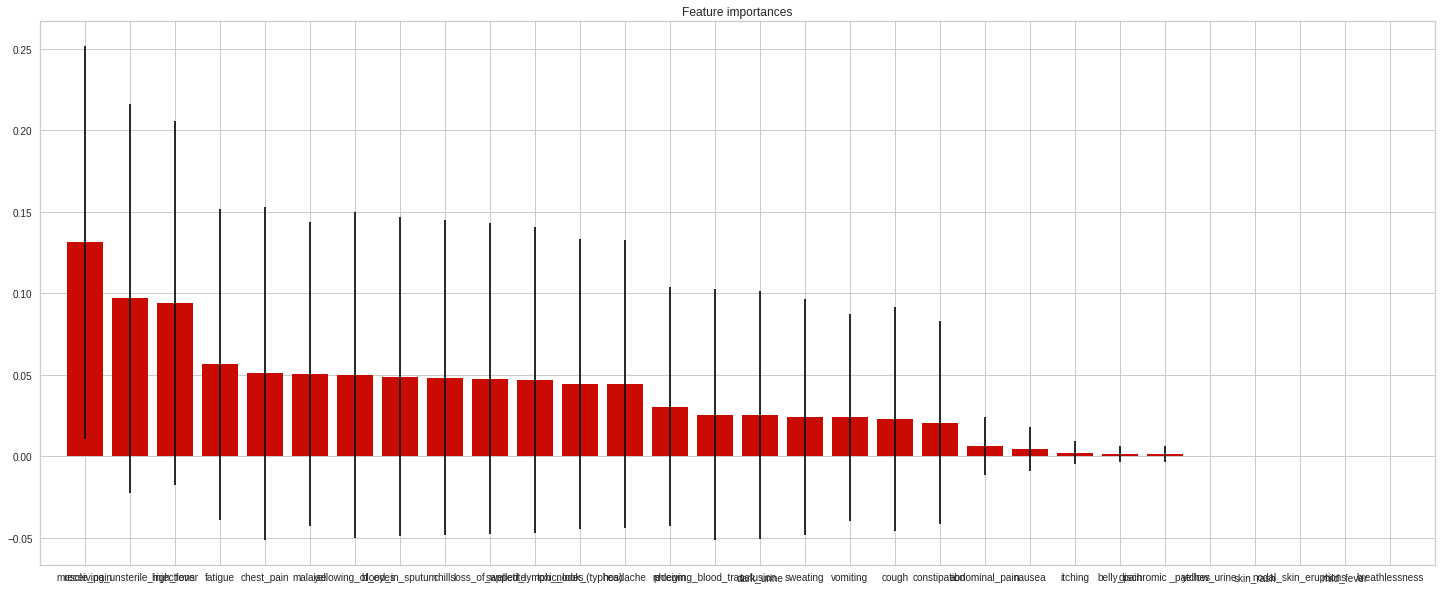

In [0]:
# print(rf_model.feature_importances_)

importances = rand_classifier.feature_importances_
std = np.std([tree.feature_importances_ for tree in rand_classifier.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature Selection and Ranking:")
feature_importances = pd.DataFrame(importances,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance',ascending=False)
print(feature_importances.head(30))

# for f in range(X_train.shape[1]):
#     print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure(figsize=(25,10))
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns[indices])
plt.xlim([-1, X_train.shape[1]])
plt.show()

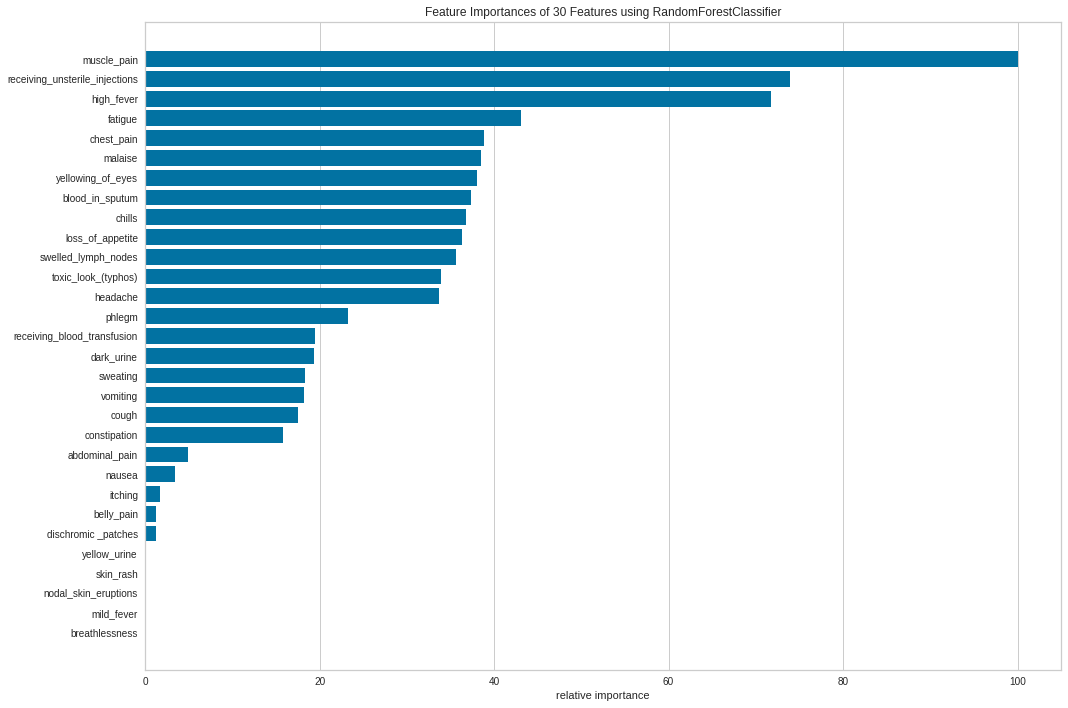

In [0]:
from yellowbrick.features.importances import FeatureImportances

# Create a new matplotlib figure
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot()

viz = FeatureImportances(rand_classifier, ax=ax)
viz.fit(X_train, Y_train)
viz.poof()

**CONFUSION MATRIX FOR RANDOM FOREST ALGORITHM**

Confusion matrix, with normalization
[[2 0 0 0 0]
 [0 2 0 0 0]
 [0 0 2 0 0]
 [0 0 0 2 0]
 [0 0 0 0 2]]


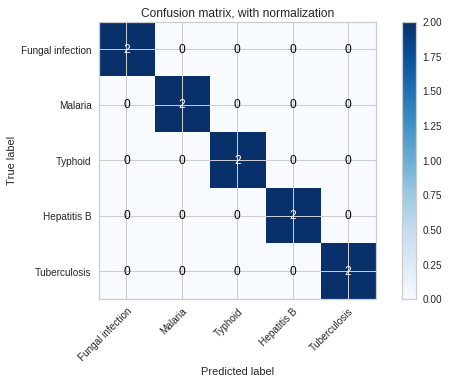

In [0]:
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
#     classes = classes[unique_labels(y_true, y_pred)]
    classes=y_pred
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, with normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=y_true,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax
  
# X_train  
# Y_test=labelencoder.transform(Y_test)
# print(rf_disease_pred)
class_names = test_data.prognosis
plot_confusion_matrix(Y_test,rf_disease_pred, classes=class_names,
                      title='Confusion matrix, with normalization')

**PLOT CONFUSION MATRIX FOR NAIVE BAYE ALGORITHM**

Confusion matrix, with normalization
[[2 0 0 0 0]
 [0 2 0 0 0]
 [1 0 1 0 0]
 [0 0 0 2 0]
 [0 0 0 0 2]]


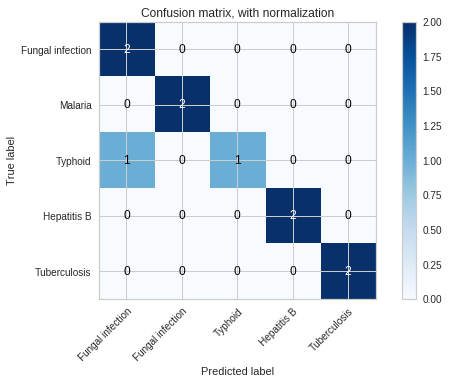

In [0]:
plot_confusion_matrix(Y_test,disease_pred, classes=class_names,
                      title='Confusion matrix, with normalization')

**HISTOGRAM RESULTS FOR BOTH NAIVE BAYE AND RANDOM FOREST CLASSIFIERS**